In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
paygap = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-28/paygap.csv')
paygap

,employer_name,employer_id,address,post_code,company_number,sic_codes,diff_mean_hourly_percent,diff_median_hourly_percent,diff_mean_bonus_percent,diff_median_bonus_percent,...,female_upper_middle_quartile,male_top_quartile,female_top_quartile,company_link_to_gpg_info,responsible_person,employer_size,current_name,submitted_after_the_deadline,due_date,date_submitted
0,"Bryanston School, Incorporated",676,"Bryanston House, Blandford, Dorset, DT11 0PX",DT11 0PX,00226143,85310,18.0,28.2,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,2018-04-05T00:00:00Z,2018-03-27T11:42:49Z
1,"RED BAND CHEMICAL COMPANY, LIMITED",16879,"19 Smith's Place, Leith Walk, Edinburgh, EH6 8NU",EH6 8NU,SC016876,47730,2.3,-2.7,15.0,37.5,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,2018-04-05T00:00:00Z,2018-03-28T16:44:25Z
2,123 EMPLOYEES LTD,17677,"34 Roundhay Road, Leeds, England, LS7 1AB",LS7 1AB,10530651,78300,41.0,36.0,-69.8,-157.2,...,89.0,23.0,77.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,True,2018-04-05T00:00:00Z,2018-05-04T11:24:06Z
3,1610 LIMITED,682,"Trinity Sports And Leisure, Chilton Street, Br...",TA6 3JA,06727055,93110,-22.0,-34.0,-47.0,-67.0,...,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,2018-04-05T00:00:00Z,2018-04-12T17:03:26Z
4,1879 EVENTS MANAGEMENT LIMITED,17101,"The Sunderland Stadium Of Light, Sunderland, T...",SR5 1SU,07743495,56210:70229,13.4,8.1,41.4,43.7,...,77.2,58.2,41.8,https://www.safc.com/news/club-news/2018/march...,Jo Graham (Deputy HR Manager),250 to 499,1879 EVENTS MANAGEMENT LIMITED,False,2018-04-05T00:00:00Z,2018-03-29T15:32:33Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48706,VENTRICA LTD,17545,"4th Floor Tylers House, Tylers Avenue, Southen...",SS1 2BB,06908560,82200,18.1,0.0,59.3,28.9,...,58.6,42.3,57.7,NaN,Stephen West (Chief Operating Officer),500 to 999,VENTRICA LTD,False,2023-04-05T00:00:00Z,2022-04-06T13:01:37Z
48707,W. LIDDY & COMPANY LIMITED,13424,"Unit 28 Apex Business Village, Cramlington, No...",NE23 7BF,02860364,56102,7.2,0.3,2.5,2.9,...,42.0,54.6,45.4,NaN,SARA DAVIS (PAYROLL MANAGER),500 to 999,W. LIDDY & COMPANY LIMITED,False,2023-04-05T00:00:00Z,2022-05-10T10:52:44Z
48708,"WELLS CATHEDRAL SCHOOL, LIMITED",13591,"The Bursary, Wells Cathedral School, College R...",BA5 2SX,00564883,85100:85200:85310:85520,30.0,57.0,NaN,NaN,...,63.0,42.0,58.0,NaN,Bethan Drake (PA to the Bursar),250 to 499,"WELLS CATHEDRAL SCHOOL, LIMITED",False,2023-04-05T00:00:00Z,2022-05-17T11:24:01Z
48709,WESSEX EAGLE LIMITED,15245,"Eagle Plant, Beeching Close, Chard, Somerset, ...",TA20 1BB,01540286,77320,10.8,9.2,30.7,31.8,...,2.0,94.0,6.0,NaN,Gary Parfoot (Director),250 to 499,WESSEX EAGLE LIMITED,False,2023-04-05T00:00:00Z,2022-04-08T14:37:21Z


In [3]:
paygap.columns

Index(['employer_name', 'employer_id', 'address', 'post_code',
       'company_number', 'sic_codes', 'diff_mean_hourly_percent',
       'diff_median_hourly_percent', 'diff_mean_bonus_percent',
       'diff_median_bonus_percent', 'male_bonus_percent',
       'female_bonus_percent', 'male_lower_quartile', 'female_lower_quartile',
       'male_lower_middle_quartile', 'female_lower_middle_quartile',
       'male_upper_middle_quartile', 'female_upper_middle_quartile',
       'male_top_quartile', 'female_top_quartile', 'company_link_to_gpg_info',
       'responsible_person', 'employer_size', 'current_name',
       'submitted_after_the_deadline', 'due_date', 'date_submitted'],
      dtype='object')

In [4]:
paygap.drop(['post_code', 'company_number', 'sic_codes', 'employer_name', 'employer_id', 'address', 'company_link_to_gpg_info', 'responsible_person', 'current_name', 'submitted_after_the_deadline', 'due_date', 'date_submitted'], axis=1, inplace=True)
paygap

,diff_mean_hourly_percent,diff_median_hourly_percent,diff_mean_bonus_percent,diff_median_bonus_percent,male_bonus_percent,female_bonus_percent,male_lower_quartile,female_lower_quartile,male_lower_middle_quartile,female_lower_middle_quartile,male_upper_middle_quartile,female_upper_middle_quartile,male_top_quartile,female_top_quartile,employer_size
0,18.0,28.2,0.0,0.0,0.0,0.0,24.4,75.6,50.8,49.2,49.2,50.8,51.5,48.5,500 to 999
1,2.3,-2.7,15.0,37.5,15.6,66.7,20.3,79.7,25.4,74.6,10.3,89.7,18.1,81.9,250 to 499
2,41.0,36.0,-69.8,-157.2,50.0,73.5,0.0,100.0,2.0,98.0,11.0,89.0,23.0,77.0,250 to 499
3,-22.0,-34.0,-47.0,-67.0,25.0,75.0,56.0,44.0,52.0,48.0,30.0,70.0,24.0,76.0,250 to 499
4,13.4,8.1,41.4,43.7,8.7,3.2,29.1,70.9,49.4,50.6,22.8,77.2,58.2,41.8,250 to 499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48706,18.1,0.0,59.3,28.9,3.0,1.7,30.5,69.5,30.7,69.3,41.4,58.6,42.3,57.7,500 to 999
48707,7.2,0.3,2.5,2.9,12.8,10.6,58.1,41.9,48.9,51.1,58.0,42.0,54.6,45.4,500 to 999
48708,30.0,57.0,NaN,NaN,0.0,0.0,16.0,84.0,27.0,73.0,37.0,63.0,42.0,58.0,250 to 499
48709,10.8,9.2,30.7,31.8,78.0,88.0,91.0,9.0,91.0,9.0,98.0,2.0,94.0,6.0,250 to 499


In [5]:
paygap.shape

(48711, 15)

In [6]:
pd.unique(paygap['employer_size'])

array(['500 to 999', '250 to 499', '5000 to 19,999', '1000 to 4999',
       'Not Provided', 'Less than 250', '20,000 or more'], dtype=object)

In [7]:
mean_hourly = paygap[['diff_mean_hourly_percent', 'diff_median_hourly_percent', 'diff_mean_bonus_percent', 'diff_median_bonus_percent', 'employer_size']]
mean_hourly

,diff_mean_hourly_percent,diff_median_hourly_percent,diff_mean_bonus_percent,diff_median_bonus_percent,employer_size
0,18.0,28.2,0.0,0.0,500 to 999
1,2.3,-2.7,15.0,37.5,250 to 499
2,41.0,36.0,-69.8,-157.2,250 to 499
3,-22.0,-34.0,-47.0,-67.0,250 to 499
4,13.4,8.1,41.4,43.7,250 to 499
...,...,...,...,...,...
48706,18.1,0.0,59.3,28.9,500 to 999
48707,7.2,0.3,2.5,2.9,500 to 999
48708,30.0,57.0,NaN,NaN,250 to 499
48709,10.8,9.2,30.7,31.8,250 to 499


In [8]:
def violinPlotByCompany(value):
    chart = sns.violinplot(x='employer_size', y=value,
                       data=mean_hourly,
                       order=['Not Provided', 'Less than 250', '250 to 499', '500 to 999', '1000 to 4999', '5000 to 19,999', '20,000 or more'],
                       scale="width")

    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right'
    )
    return chart

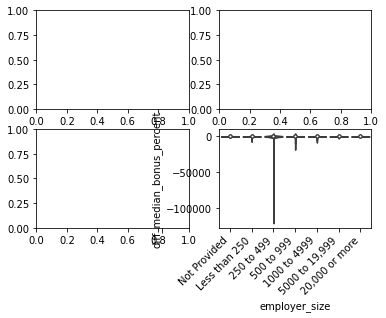

In [9]:
fig, axes = plt.subplots(2, 2)

for category in mean_hourly.columns:
    if category != 'employer_size' and category != '':
        violinPlotByCompany(mean_hourly[category])